In [4]:
#библиотеки были уже установлены на компьютер 
# !pip install matplotlib
# !pip install networkx
# !pip install nltk

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import nltk
from nltk import ngrams
import re

In [2]:
def creating_4gramms(some_text):
    cleaned_text = re.sub(r'[^\w\s]','',some_text)

    n = 4
    fourgrams = ngrams(cleaned_text.split(), n)
    list_ofourgrams = []

    for fourgram in fourgrams:
        gr_4 = set(fourgram)
        list_ofourgrams.append(gr_4)
    return list_ofourgrams

def creating_ultimate_data(fougrs_list):
    i=0
    full_data = []
    for i in range(len(fougrs_list)-1):
        for fourgram in fougrs_list:
            cnctn_counter = 0
            data = []
            if fougrs_list[i] != fourgram:
                if fougrs_list[i] & fourgram:
                    cnctn_counter += 1
                    data.append(fougrs_list[i])
                    data.append(fourgram)
                    data.append(cnctn_counter)
            else:
                continue
            full_data.append(data)
    new_full_data = []
    for data in full_data:
        new_data = []
        for elem in data:
            if type(elem) == set:
                new_elem = tuple(elem)
                new_data.append(new_elem)
            if type(elem) == int:
                new_data.append(elem)
        new_full_data.append(new_data)
    ultimate_data = filter(None, new_full_data) #удаление пустого списка
    ultimate_data = [x for x in new_full_data if x != []]
    return ultimate_data

In [3]:
#Рассмотрим на конкретном примере, файл лежит в репо
with open('C:\ФИКЛ\для питона\intro_atla.txt', 'r', encoding = 'utf-8') as f:
    text = f.read()
    fourgramms = creating_4gramms(text)
    data_for_graph = creating_ultimate_data(fourgramms)

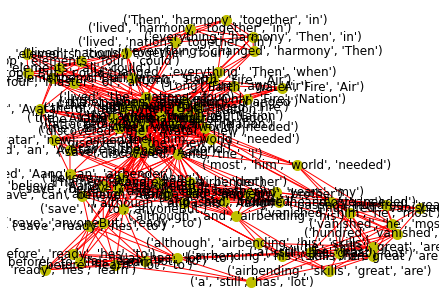

In [4]:
def buildGraph(data, thr = 0.):
    G1=nx.Graph()
    for fourg_1, fourg_2, w in data:
        if float(w) >= thr:
            G1.add_edge(fourg_1, fourg_2)
    return G1
def drawGraph(G):
    pstn=nx.spring_layout(G)
    _=nx.draw(G, pos=pstn, with_labels=True, node_color='y', node_size=100, edge_color='r')
def buildAndDrawGraph(data, thr = 0.):
    G1 = buildGraph(data_for_graph, thr)
    drawGraph(G1)
    return G1
res = buildAndDrawGraph(data_for_graph)
print(res)